<p style='text-align: right;'><i>August 1st - 4th, 2023 </i> </p>

<h1 style="background-color:orange;"></h1>

<h1 style='text-align: center;'> ColMex Team Datathon 2023 </h1>

<h3 style='text-align: center;'> <i>PART II: Music Category Selected </i> </h3>

<h5 style='text-align: center;'> <i>Our data journey</i> </h5>


<h1 style="background-color:orange;"></h1>

<div style="background-color:LightGray;"><p style='text-align: center;'><align = center>Participants: <i>Jose Niño, Eduardo Avelar, Andres Ruiz, Rodrigo Quezada </i></p></div>  

***

 ### Imports and initial data set pull

> Getting started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

In [2]:
# Acronym for the Streaming Data Set is smds

datathon_music_8323_file = "/Users/dslab/Downloads/stream_data_music_70223.parquet"
smds = pd.read_parquet(datathon_music_8323_file, engine='pyarrow')

In [3]:
# Acronym for the Batch Music Batch Data Set is bmds

datathon_music_batch_8323_file = "/Users/dslab/Downloads/batch_data_music_all.parquet"
bmds = pd.read_parquet(datathon_music_batch_8323_file, engine='pyarrow')

### EDA / Data Profiling

<br/>

> 1. Dimension shape

> 2. Check head and tail 

> 3. Review data types, column names, and identify missing data

> 4. Determine overall data quality


In [4]:
# Understand scope of sample data set for reviews

smds.shape

(33924, 11)

In [5]:
# Understand scope of sample data set for metadata

bmds.shape

(291631, 11)

In [6]:
# Check initial display on reviews

smds.head(2)

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,id,style,vote,image
10,B0002EB5P8,5.0,What a fun way to enjoy music! It's fun to in...,A33OSMGPGT8HDV,barkej,Great Standards,true,23624,None,2,None
12,B0002E59IC,4.0,Chose this speaker because it seemed like the ...,A1UDQQU0EPVH8C,wayner-Take-1,Loud and clear,true,23752,None,None,None


In [7]:
# Check initial display on metadata

bmds.head(2)

,asin,image,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0,B00N9330MU,None,4.0,When my & and 5 yr old daughters opened it at ...,A3V0480PVRUZGP,Cluckadoodledoo,None,... yr old daughters opened it at Christmas I ...,1421452800,false,9
1,B00N9330MU,None,4.0,My daughter loves this machine. The volume is ...,ANM0OAW6DMOSD,Misty Christian,None,Four Stars,1412553600,true,9


In [8]:
# Check overall data set information on column names, missing data and data types for reviews

smds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33924 entries, 10 to 70221
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   asin          33924 non-null  object
 1   overall       33924 non-null  object
 2   reviewText    33897 non-null  object
 3   reviewerID    33924 non-null  object
 4   reviewerName  33924 non-null  object
 5   summary       33917 non-null  object
 6   verified      33924 non-null  object
 7   id            33924 non-null  object
 8   style         7243 non-null   object
 9   vote          4912 non-null   object
 10  image         539 non-null    object
dtypes: object(11)
memory usage: 3.1+ MB


In [9]:
# Check overall data set information on column names, missing data and data types for metadata

bmds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291631 entries, 0 to 291630
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            291631 non-null  object
 1   image           6842 non-null    object
 2   overall         291631 non-null  object
 3   reviewText      291440 non-null  object
 4   reviewerID      291631 non-null  object
 5   reviewerName    291599 non-null  object
 6   style           124175 non-null  object
 7   summary         291567 non-null  object
 8   unixReviewTime  291631 non-null  object
 9   verified        291631 non-null  object
 10  vote            44582 non-null   object
dtypes: object(11)
memory usage: 24.5+ MB


#### Checking relationship of asin among the 2 data frames

In [10]:
# Reviews data set against Metadata data set

smds['asin'].isin(bmds['asin']).value_counts()

False    33924
Name: asin, dtype: int64

In [11]:
# Metadata data set against Reviews data set

bmds['asin'].isin(smds['asin']).value_counts()

False    291631
Name: asin, dtype: int64

In [12]:
smds.describe()

,asin,overall,reviewText,reviewerID,reviewerName,summary,verified,id,style,vote,image
count,33924,33924,33897,33924,33924,33917,33924,33924,7243,4912,539
unique,4830,5,27235,26235,21862,19009,2,33924,986,48,459
top,B0002F742K,5.0,Great,A2NYK9KWFMJV4Y,Amazon Customer,Five Stars,true,23624,"{""Color:"":"" Black""}",2,"[""https://images-na.ssl-images-amazon.com/imag..."
freq,20,22670,76,78,2358,6885,28893,1,1082,1919,4


In [13]:
bmds.describe()

,asin,image,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
count,291631,6842,291631,291440,291631,291599,124175,291567,291631,291631,44582
unique,30085,6718,5,266276,245074,176500,5285,168548,4659,2,218
top,B000ULAP4U,"[""https://images-na.ssl-images-amazon.com/imag...",5.0,good,A2NYK9KWFMJV4Y,Amazon Customer,"{""Color:"":"" Black""}",Five Stars,1456790400,true,2
freq,4243,2,186646,575,82,24423,11587,53732,436,258947,16640


## Initial prep work prior to EDA

> Rename overall column to score as if we decide on predictive ML this will be the Target Variable

> Drop the columns that are not providing enough information gain

> Change score column data type to int64

> Change unixReviewTime column data type to datetime64[ns] to make it more human readable friendly

> Change the unixReviewTime column name timestamp now that it has the friendly display

> Sort by timestamp and reset index to match the new order

> Add feature engineering for dates as will be helpful for the data analysis phase

> Convert date column from object to date data type M8[ns]

> Final check to confirm the null values left are unavoidable and thus keeping those

In [14]:
# Changing the column name at current 1% scope Review Data Set

smds.rename(columns = {'overall':'score'}, inplace = True)
smds.head(1)

,asin,score,reviewText,reviewerID,reviewerName,summary,verified,id,style,vote,image
10,B0002EB5P8,5.0,What a fun way to enjoy music! It's fun to in...,A33OSMGPGT8HDV,barkej,Great Standards,true,23624,None,2,None


In [15]:
# Changing the column name at current 1% scope Review Data Set

bmds.rename(columns = {'overall':'score'}, inplace = True)
bmds.head(1)

,asin,image,score,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0,B00N9330MU,None,4.0,When my & and 5 yr old daughters opened it at ...,A3V0480PVRUZGP,Cluckadoodledoo,None,... yr old daughters opened it at Christmas I ...,1421452800,false,9


In [16]:
# Remove columns that are not needed

smds.drop(['style','vote','image', 'reviewerName', 'id'], axis = 1, inplace = True)
smds.head(1)

,asin,score,reviewText,reviewerID,summary,verified
10,B0002EB5P8,5.0,What a fun way to enjoy music! It's fun to in...,A33OSMGPGT8HDV,Great Standards,true


In [17]:
# Remove columns that are not needed

bmds.drop(['style','vote','image', 'reviewerName'], axis = 1, inplace = True)
bmds.head(1)

,asin,score,reviewText,reviewerID,summary,unixReviewTime,verified
0,B00N9330MU,4.0,When my & and 5 yr old daughters opened it at ...,A3V0480PVRUZGP,... yr old daughters opened it at Christmas I ...,1421452800,false


In [18]:
# Change score to int64 data type

smds['score'].replace(['1.0', '2.0', '3.0', '4.0', '5.0'], [1, 2, 3, 4, 5], inplace = True)
smds.dtypes

asin          object
score          int64
reviewText    object
reviewerID    object
summary       object
verified      object
dtype: object

In [19]:
# Change score to int64 data type

bmds['score'].replace(['1.0', '2.0', '3.0', '4.0', '5.0'], [1, 2, 3, 4, 5], inplace = True)
bmds.dtypes

asin              object
score              int64
reviewText        object
reviewerID        object
summary           object
unixReviewTime    object
verified          object
dtype: object

In [20]:
bmds['unixReviewTime'] = pd.to_datetime(bmds['unixReviewTime'], unit='s')
bmds.dtypes

asin                      object
score                      int64
reviewText                object
reviewerID                object
summary                   object
unixReviewTime    datetime64[ns]
verified                  object
dtype: object

In [21]:
# Now change the name to timestamp

bmds.rename(columns = {'unixReviewTime':'timestamp'}, inplace = True)
bmds.head(1)

,asin,score,reviewText,reviewerID,summary,timestamp,verified
0,B00N9330MU,4,When my & and 5 yr old daughters opened it at ...,A3V0480PVRUZGP,... yr old daughters opened it at Christmas I ...,2015-01-17,false


In [22]:
# Sorting data set per time line and reseting index

bmds.sort_values(by = ['timestamp'], inplace = True)
bmds.reset_index(inplace = True, drop = True)
bmds.head()

,asin,score,reviewText,reviewerID,summary,timestamp,verified
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,2000-04-05,false
1,0879306211,5,Mr. Smith was able to write a story of the evo...,A3ENXEQFPNMJ86,The only unbiased book that tells the whole story,2000-10-11,false
2,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,2001-08-16,false
3,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,2002-03-01,true
4,B000065BP9,5,These headphones are very good. The sound is ...,A26F9R9BU88198,Great sound. Good price.,2002-06-01,false


In [23]:
# Checking sorting at the end of the data set as well

bmds.tail()

,asin,score,reviewText,reviewerID,summary,timestamp,verified
291626,B01EWOUFEA,5,Great price for a great product.,A1FQOGLD0LVXYY,Great price.,2018-09-25,true
291627,B01DMFP1TO,5,A necessity on charcoal smokers.,A34SYC4UTVAK3G,A necessity on charcoal smokers.,2018-09-26,true
291628,B01HBJ7B3Q,1,Just opened my notebook to work on a Jazz arra...,A1DMBC8UQMNB2D,4 line staff,2018-09-28,true
291629,B01FXIZ5G2,4,This product is what I would consider average ...,A1NHM0X4I4E23V,Decent quality,2018-09-29,true
291630,B01FXIZ5G2,1,"Cannot change the light color, it won't connec...",A2RN0VV1IWEQ4K,Only flashes red,2018-09-29,true


In [24]:
# Some feature engineering for time and date

bmds['date'] = pd.to_datetime(bmds['timestamp']).dt.date
bmds['year'] = pd.to_datetime(bmds['timestamp']).dt.year
bmds.head(1)

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,2000-04-05,false,2000-04-05,2000


In [25]:
# Confirm data types

bmds.dtypes

asin                  object
score                  int64
reviewText            object
reviewerID            object
summary               object
timestamp     datetime64[ns]
verified              object
date                  object
year                   int64
dtype: object

In [26]:
# Convert date column from object to date

bmds['date'] = pd.to_datetime(bmds['date'])
bmds['date'].dtypes

dtype('<M8[ns]')

In [27]:
# Final confirmation on null values and that they do not interfere with the analyisis

bmds.isnull().sum()

asin            0
score           0
reviewText    191
reviewerID      0
summary        64
timestamp       0
verified        0
date            0
year            0
dtype: int64

In [28]:
# Final summary statistics of the current 1% scope Review Data Set

bmds.describe(include='all', datetime_is_numeric=True)

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year
count,291631,291631.000000,291440,291631,291567,291631,291631,291631,291631.000000
unique,30085,NaN,266276,245074,168548,NaN,2,NaN,NaN
top,B000ULAP4U,NaN,good,A2NYK9KWFMJV4Y,Five Stars,NaN,true,NaN,NaN
freq,4243,NaN,575,82,53732,NaN,258947,NaN,NaN
mean,NaN,4.215149,NaN,NaN,NaN,2015-09-16 19:13:37.826637056,NaN,2015-09-16 19:13:37.826637056,2015.235702
min,NaN,1.000000,NaN,NaN,NaN,2000-04-05 00:00:00,NaN,2000-04-05 00:00:00,2000.000000
25%,NaN,4.000000,NaN,NaN,NaN,2014-09-28 00:00:00,NaN,2014-09-28 00:00:00,2014.000000
50%,NaN,5.000000,NaN,NaN,NaN,2016-02-20 00:00:00,NaN,2016-02-20 00:00:00,2016.000000
75%,NaN,5.000000,NaN,NaN,NaN,2017-03-07 00:00:00,NaN,2017-03-07 00:00:00,2017.000000
max,NaN,5.000000,NaN,NaN,NaN,2018-09-29 00:00:00,NaN,2018-09-29 00:00:00,2018.000000


In [29]:
print(f'Amount of years in this data set is :')
print(len(bmds['year'].unique()))

Amount of years in this data set is :
19


In [30]:
print(f'List/array of years in this data set in order:')
print(bmds['year'].unique())

List/array of years in this data set in order:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


In [31]:
# we can by now drop the timestamp column as date with time is not needed

bmds.drop(['timestamp'], axis = 1, inplace = True)
bmds.head(1)

,asin,score,reviewText,reviewerID,summary,verified,date,year
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,false,2000-04-05,2000


In [32]:
# we can finally add another feature engineering column for reference for counting called "cnt" with a constant

#rds['cnt'] = pd.Series([1 for x in range(len(rds.index))])
#rds.head()

## EDA 

> Form smaller data sets/subsets for target processing

> Work with timelines to display reviews and score behaviors over time


In [33]:
# Reviews data set against stream data set

bmds['asin'].isin(smds['asin']).value_counts()

False    291631
Name: asin, dtype: int64

In [34]:
# Reviews data set against batch data set

smds['asin'].isin(bmds['asin']).value_counts()

False    33924
Name: asin, dtype: int64

In [35]:
# Using data set acronym as SoftWare Metadata Data Set as swmds

datathon_metadata_pkt_731_file = "/Users/dslab/Downloads/andres_metadata_music.parquet"
mds = pd.read_parquet(datathon_metadata_pkt_731_file, engine='pyarrow')

In [36]:
mds.shape

(121139, 18)

In [37]:
mds.head()

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
3529,[],[],B006VZZGPW,SAP,"[Home & Kitchen, Seasonal Dcor, Seasonal Light...","November 23, 2011",[This LED rope light is your must-have decor f...,"{' Item Weight: ': None, ' Packag...","[LED Color: RGB(Red, Green, Blue,Yellow), Crys...",,[https://images-na.ssl-images-amazon.com/image...,Musical Instruments,$119.99,"["">#91,699 in Musical Instruments (See Top 100...","class=""a-bordered a-horizontal-stripes a-spa...",,,Christmas Lighting LED Rope Light 150ft Multi-...
3863,[],"[B001Q3KTLA, B06WGR7WCZ, B008VGX3CC, B003YJPC2...",B006WBSS8M,Grundorf,"[Home & Kitchen, Furniture, Game & Recreation ...","January 1, 2012",[Another Grundorf original design. The AT-6022...,"{' Item Weight: ': None, ' Packag...",[Adjustable legs that give you just the height...,,[],Musical Instruments,,"["">#141,738 in Musical Instruments (See Top 10...",,,,Grundorf Corporation AT-6022B Channel Mixer Stand
6438,[],[],B006ZM4ZTE,Party Dots,"[Home & Kitchen, Event & Party Supplies, Decor...","January 19, 2012",[Mini Sticky Lights. Peel and Stick Super Brig...,"{' Item Weight: ': None, ' Packag...","[Mini Peel and Stick LED Lights - blinks, flas...",,[https://images-na.ssl-images-amazon.com/image...,Musical Instruments,$12.80,"["">#56,667 in Musical Instruments (See Top 100...",,,,PARTY DOTS - White Peel N Stick LED Light - 5 ...
8892,[],[],B00725KBM8,Bruce Teleky,"[Home & Kitchen, Wall Art, Posters & Prints]","January 27, 2012",[Violin and Guitar poster by Pablo Picasso. Po...,"{' Item Weight: ': None, ' Packag...","[Artist Name - Pablo Picasso, Size - 24 x 32]",,[],Musical Instruments,,"["">#300,699 in Musical Instruments (See Top 10...",,,,Violin and Guitar - Poster by Pablo Picasso (2...
9495,[],"[B000Y040ZC, B00BPM7INO, B003P15MTK, B06XB6HJR...",B0072LMYUY,Unspecified,"[Home & Kitchen, Bedding, Comforters & Sets, C...","June 12, 2007",[The Impressionist Chinrest Comforter - Black ...,"{' Item Weight: ': None, ' Packag...",[],,[https://images-na.ssl-images-amazon.com/image...,Musical Instruments,,"["">#73,168 in Musical Instruments (See Top 100...",,,,The Impressionist Chinrest Comforter - Black L...


In [38]:
mds.tail()

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
8669,"[B00HV7U5VE, B01N36VGFI, B000XPRUX2, B01B1JI9AQ]","[B004LRZC6A, B00RCO415C]",B001D4MVYA,Meinl Percussion,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...","July 9, 2008",[The Kessing is a traditional djembe accessory...,"{' Item Weight: ': None, ' Packag...","[Accompaniment to djembe, Removable, Medium si...",,[https://images-na.ssl-images-amazon.com/image...,Musical Instruments,,"["">#82,753 in Musical Instruments (See Top 100...",,,,Meinl Percussion KES-01 Aluminum Kessing for D...
9913,[],[],B001DIYHKW,,"[Home & Kitchen, Home Dcor]","July 22, 2015",[],"{' Item Weight: ': None, ' Packag...",[],,[],Musical Instruments,,"["">#269,984 in Musical Instruments (See Top 10...",,,,Mini Guitar SLASH GUNS N ROSES Snake Pit Stat...
302,[],[B005F25DUU],B0079VKTSQ,Martin Smith,"[Grocery & Gourmet Food, Beverages, Coffee, Te...","March 7, 2014",[The Martin Smith 1/2 Size Classical Guitar Pa...,"{' Item Weight: ': None, ' Packag...",[Quality 1/2 size classical guitar ideal for a...,,[https://images-na.ssl-images-amazon.com/image...,Musical Instruments,,"["">#244,562 in Musical Instruments (See Top 10...","class=""a-bordered a-horizontal-stripes a-spa...",,,Martin Smith Classical Guitar 34 Inches 1/2 Si...
7835,[],[],B00435JS3S,Diogen,"[Automotive, Replacement Parts, Lighting & Ele...","August 7, 2010",[Brand Diogen - Part No. ENDTSPLIT - Color Gre...,"{' Item Weight: ': None, ' Packag...",[],,[],Musical Instruments,,[],,,,Diogen ENDTSPLIT - T Splitter for the Diogen L...
8384,[],[],B0043WMDPQ,Neotech,"[Automotive, Interior Accessories, Seat Covers...","December 27, 2010",[Maintaining proper posture is a key factor fo...,"{' Item Weight: ': None, ' Packag...","[Durable inflatable vinyl seat cushion., Promo...",,[https://images-na.ssl-images-amazon.com/image...,Musical Instruments,$10.95,"["">#115,794 in Musical Instruments (See Top 10...",,,,"Neotech 2801222 The Wedge, Black - Seat Cushion"


In [39]:
mds.columns

Index(['also_buy', 'also_view', 'asin', 'brand', 'category', 'date',
       'description', 'details', 'feature', 'fit', 'image', 'main_cat',
       'price', 'rank', 'similar_item', 'tech1', 'tech2', 'title'],
      dtype='object')

In [40]:
# Acronym as New Metadata Data Set as nmds


nmds = mds[['asin', 'brand', 'title']]
nmds.head(1)

,asin,brand,title
3529,B006VZZGPW,SAP,Christmas Lighting LED Rope Light 150ft Multi-...


In [41]:
nmds.shape

(121139, 3)

In [42]:
bmds.shape

(291631, 8)

In [43]:
bmds['asin'].describe()

count         291631
unique         30085
top       B000ULAP4U
freq            4243
Name: asin, dtype: object

In [44]:
# Reviews data set against Metadata data set

bmds['asin'].isin(nmds['asin']).value_counts()

True    291631
Name: asin, dtype: int64

In [45]:
# Reviews data set against Metadata data set

nmds['asin'].isin(bmds['asin']).value_counts()

False    90135
True     31004
Name: asin, dtype: int64

In [46]:
bmds.sort_values(by = ['date'], inplace = True)
bmds.reset_index(inplace = True, drop = True)
bmds.head()

,asin,score,reviewText,reviewerID,summary,verified,date,year
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,false,2000-04-05,2000
1,0879306211,5,Mr. Smith was able to write a story of the evo...,A3ENXEQFPNMJ86,The only unbiased book that tells the whole story,false,2000-10-11,2000
2,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,false,2001-08-16,2001
3,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,true,2002-03-01,2002
4,B000065BP9,5,These headphones are very good. The sound is ...,A26F9R9BU88198,Great sound. Good price.,false,2002-06-01,2002


In [47]:
bmds.tail()

,asin,score,reviewText,reviewerID,summary,verified,date,year
291626,B01EWOUFEA,5,Great price for a great product.,A1FQOGLD0LVXYY,Great price.,true,2018-09-25,2018
291627,B01DMFP1TO,5,A necessity on charcoal smokers.,A34SYC4UTVAK3G,A necessity on charcoal smokers.,true,2018-09-26,2018
291628,B01HBJ7B3Q,1,Just opened my notebook to work on a Jazz arra...,A1DMBC8UQMNB2D,4 line staff,true,2018-09-28,2018
291629,B01FXIZ5G2,4,This product is what I would consider average ...,A1NHM0X4I4E23V,Decent quality,true,2018-09-29,2018
291630,B01FXIZ5G2,1,"Cannot change the light color, it won't connec...",A2RN0VV1IWEQ4K,Only flashes red,true,2018-09-29,2018


In [48]:
# Using acronym One Data Set as ods

mods = pd.merge(bmds, nmds, how='inner', on='asin')

# Making sure all rows of Reviews are still at data set

mods.shape

(311670, 10)

In [49]:
# Not sure why the increase during the merge, should have been 291,631

311670 - 291631

20039

In [50]:
duplicates = mods[mods.duplicated()]
 
print("Display of duplicated rows :")
duplicates

Display of duplicated rows :


,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
20,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,false,2001-08-16,2001,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
22,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,true,2002-03-01,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
24,B00005K9DV,4,I really like the Yamaha EZ30! It makes it fu...,A3QNTXW862DLWT,Makes it fun to learn!,false,2002-09-13,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
26,B000065BP9,5,These headphones are very good. The sound is ...,A26F9R9BU88198,Great sound. Good price.,false,2002-06-01,2002,Sennheiser,Sennheiser HD 202 Dynamic Headphones (Old Ver...
28,B000065BP9,5,I've been listening to a wide variety of music...,A37I2C8WJUTTVJ,"Comfortable, clear, and really cool",false,2002-09-09,2002,Sennheiser,Sennheiser HD 202 Dynamic Headphones (Old Ver...
...,...,...,...,...,...,...,...,...,...,...
310942,B0002H02ZY,5,"Well received, thanks",A11OZGNG2BT6FN,Five Stars,true,2018-05-17,2018,Sony,Sony MDR7506 Professional Large Diaphragm Head...
310944,B0002H02ZY,5,I run the sound board and record the CDs for m...,AMP3UF9U0S1C0,Industry Standard,true,2018-05-18,2018,Sony,Sony MDR7506 Professional Large Diaphragm Head...
310946,B0002H02ZY,5,Industry standard for a reason :),A336BZ20XP5C9R,Five Stars,true,2018-05-18,2018,Sony,Sony MDR7506 Professional Large Diaphragm Head...
311139,B0002F4VXU,1,I have been playing the violin for the last 8 ...,A2S73UJVY3V9LQ,Big Disappointment,true,2018-05-23,2018,Thomastik-Infeld,Thomastik-Infeld S15 Custom


In [51]:
# Checking the first asin of the list

mods[mods['asin'] == 'B00005K9DV']

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
19,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,false,2001-08-16,2001,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
20,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,false,2001-08-16,2001,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
21,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,true,2002-03-01,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
22,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,true,2002-03-01,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
23,B00005K9DV,4,I really like the Yamaha EZ30! It makes it fu...,A3QNTXW862DLWT,Makes it fun to learn!,false,2002-09-13,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
24,B00005K9DV,4,I really like the Yamaha EZ30! It makes it fu...,A3QNTXW862DLWT,Makes it fun to learn!,false,2002-09-13,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...


In [52]:
mods.drop_duplicates(keep='first', inplace=True)
mods.shape

(287123, 10)

In [53]:
duplicates = mods[mods.duplicated()]
 
print("Display of duplicated rows :")
duplicates

Display of duplicated rows :


,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title


In [54]:
mods.sort_values(by = ['date'], inplace = True)
mods.reset_index(inplace = True, drop = True)
mods.head()

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,false,2000-04-05,2000,Hal Leonard,Hal Leonard Third Eye Blind - Guitar Recorded ...
1,0879306211,5,Mr. Smith was able to write a story of the evo...,A3ENXEQFPNMJ86,The only unbiased book that tells the whole story,false,2000-10-11,2000,Hal Leonard,Hal Leonard 50 Years of Fender - Half a Centur...
2,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,false,2001-08-16,2001,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
3,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,true,2002-03-01,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...
4,B000065BP9,5,These headphones are very good. The sound is ...,A26F9R9BU88198,Great sound. Good price.,false,2002-06-01,2002,Sennheiser,Sennheiser HD 202 Dynamic Headphones (Old Ver...


In [55]:
mods.tail()

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
287118,B01EWOUFEA,5,Great price for a great product.,A1FQOGLD0LVXYY,Great price.,true,2018-09-25,2018,MFL.,MFL C226 330lb Stage Light Clamp C Clamp Trigg...
287119,B01DMFP1TO,5,A necessity on charcoal smokers.,A34SYC4UTVAK3G,A necessity on charcoal smokers.,true,2018-09-26,2018,FireBlack,Fireblack125 1/2 x 1/8 Black Hi Temp BBQ smoke...
287120,B01HBJ7B3Q,1,Just opened my notebook to work on a Jazz arra...,A1DMBC8UQMNB2D,4 line staff,true,2018-09-28,2018,MAXCURY,Blank Sheet Music Composition Manuscript Staff...
287121,B01FXIZ5G2,1,"Cannot change the light color, it won't connec...",A2RN0VV1IWEQ4K,Only flashes red,true,2018-09-29,2018,SJP Light,SJP Light&reg; Bluetooth Smartphone App Contro...
287122,B01FXIZ5G2,4,This product is what I would consider average ...,A1NHM0X4I4E23V,Decent quality,true,2018-09-29,2018,SJP Light,SJP Light&reg; Bluetooth Smartphone App Contro...


In [56]:
mods.isnull().sum()

asin            0
score           0
reviewText    191
reviewerID      0
summary        63
verified        0
date            0
year            0
brand           0
title           0
dtype: int64

In [57]:
mods['brand'].value_counts()

Audio-Technica                                10351
Hosa                                           8965
Pyle                                           7809
Behringer                                      6349
Shure                                          4608
                                              ...  
CarbonyTM Celtic Winds                            1
Farley's Musical Essentials                       1
bass mods                                         1
CLEAR ACRYLIC STRAT ELECTRIC GUITAR w TREM        1
TENQ                                              1
Name: brand, Length: 4312, dtype: int64

In [58]:
mods['brand'].describe()

count             287123
unique              4312
top       Audio-Technica
freq               10351
Name: brand, dtype: object

In [59]:
grp_music_brands = mods.groupby(['brand'], as_index=False)['score'].sum()
grp_music_brands

,brand,score
0,,15988
1,"""KPK"" Koa Pili Koko",94
2,1/2 SIZE QUALITY WOOD / HORSE HAIR VIOLIN BOW,41
3,1To1Music,286
4,1byone,311
...,...,...
4307,xiiTONE,10
4308,xinfly,55
4309,yamaha ypt-330,44
4310,yueton,313


In [60]:
sorted_grp_music_brands = grp_music_brands.sort_values(by=["score"], ascending = False)
sorted_grp_music_brands.reset_index(inplace = True, drop = True)
sorted_grp_music_brands.head(20)

,brand,score
0,Audio-Technica,46074
1,Hosa,39755
2,Pyle,28111
3,Behringer,26113
4,Fender,20422
5,Shure,19930
6,Yamaha,18071
7,DragonPad USA,16115
8,,15988
9,ION Audio,15967


In [61]:
mods[mods['brand'] == '']

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
58,B0002KWXQM,5,I bought this guitar as an upgrade from a begi...,A2Q2U6FABH481X,Great Guitar for intermediate player!,false,2004-09-01,2004,,WI64DL Solid Body Electric Guitar Transparent ...
80,B0002KWXQM,5,I just got my WI64DL a couple of days ago. Aft...,A7MF29RCKHKFA,Excellent Value - Don't pass this by. You won'...,false,2004-11-18,2004,,WI64DL Solid Body Electric Guitar Transparent ...
85,B0002X7P4O,4,"With this price, it must be the best option fo...",A16MT82TF7871E,Good for starters....,false,2004-12-01,2004,,Kohlert 450 Alto Sax
92,B00029X6NW,4,Until the big players like Nero and Easy CD Cr...,A2WQNHK82VTJWT,Best current option for DVD-Audio,false,2004-12-27,2004,,Minnetonka Audio Software DISC-WELDER-BRONZE D...
144,B00029X6NW,5,Good quality product. you will need multichann...,A1QBH5P7IT6WSQ,DVD-A without selling a kidney,false,2005-04-20,2005,,Minnetonka Audio Software DISC-WELDER-BRONZE D...
...,...,...,...,...,...,...,...,...,...,...
284443,B0053QF1UK,5,Bought it for my daughter. She seems very happ...,AF92U7LY9ZKRB,Works well on a viola,true,2018-06-19,2018,,Playonair Deluxe Violin Shoulder Rest
284898,B005Q0ZEP0,5,These will help me greatly.,A1BXI3412EMR2I,Five Stars,true,2018-06-25,2018,,Mark! Set! Go! Fingerboard Tapes for 12 Violins
286766,B01DDWO7E6,5,Its pricy. Honestly Id never pay $80 bucks for...,A2P7GGFUE45KMR,Seriously great. I would recommend,true,2018-08-08,2018,,Official Womens Legend of Zelda Cosplay Link C...
286833,B00XU5Z8UO,1,Not worth your time. Mine arrived missing a br...,ATD3WRA1SCZYZ,Missing parts,false,2018-08-11,2018,,Universal Carbon FPV Monitor To Transmitter Mo...


In [62]:
mods[mods['asin'] == 'B0002KWXQM']

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
58,B0002KWXQM,5,I bought this guitar as an upgrade from a begi...,A2Q2U6FABH481X,Great Guitar for intermediate player!,false,2004-09-01,2004,,WI64DL Solid Body Electric Guitar Transparent ...
80,B0002KWXQM,5,I just got my WI64DL a couple of days ago. Aft...,A7MF29RCKHKFA,Excellent Value - Don't pass this by. You won'...,false,2004-11-18,2004,,WI64DL Solid Body Electric Guitar Transparent ...


In [63]:
mods[mods['asin'] == 'B00029X6NW']

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title
92,B00029X6NW,4,Until the big players like Nero and Easy CD Cr...,A2WQNHK82VTJWT,Best current option for DVD-Audio,false,2004-12-27,2004,,Minnetonka Audio Software DISC-WELDER-BRONZE D...
144,B00029X6NW,5,Good quality product. you will need multichann...,A1QBH5P7IT6WSQ,DVD-A without selling a kidney,false,2005-04-20,2005,,Minnetonka Audio Software DISC-WELDER-BRONZE D...
14466,B00029X6NW,5,When I was looking for an inexpensive way to c...,A2O7Q5Z38URZ2X,Easy to use DVD-A software,true,2011-09-03,2011,,Minnetonka Audio Software DISC-WELDER-BRONZE D...


In [64]:
# Feature engineering by addign a constant that can be useful later before empty brand values clean up

mods['cnt'] = pd.Series([1 for x in range(len(mods.index))])
mods.head(1)

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title,cnt
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,false,2000-04-05,2000,Hal Leonard,Hal Leonard Third Eye Blind - Guitar Recorded ...,1


In [65]:
# Clean mods without the brand that has no value then

cmods = mods[mods['brand'] != '' ]
cmods.shape

(283068, 11)

In [66]:
cmods.head()

,asin,score,reviewText,reviewerID,summary,verified,date,year,brand,title,cnt
0,0793587395,4,I bought this book about a week ago and i lear...,AU5M0ZJJOW2JW,A amazing guitar tab book,false,2000-04-05,2000,Hal Leonard,Hal Leonard Third Eye Blind - Guitar Recorded ...,1
1,0879306211,5,Mr. Smith was able to write a story of the evo...,A3ENXEQFPNMJ86,The only unbiased book that tells the whole story,false,2000-10-11,2000,Hal Leonard,Hal Leonard 50 Years of Fender - Half a Centur...,1
2,B00005K9DV,5,Amazing keyboard from Yamaha. I have always wa...,A2OTFCTT0QMJZV,WOW! I can play!!!,false,2001-08-16,2001,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...,1
3,B00005K9DV,5,The EZ30 is without a doubt the best keyboard ...,AW0NAOOVASH53,A Beginners Dream Come True!,true,2002-03-01,2002,Yamaha,Yamaha EZ30AD 61-Note Touch-Sensitive Portable...,1
4,B000065BP9,5,These headphones are very good. The sound is ...,A26F9R9BU88198,Great sound. Good price.,false,2002-06-01,2002,Sennheiser,Sennheiser HD 202 Dynamic Headphones (Old Ver...,1


In [67]:
# Now get a subset for visuals

brand_n_score_timeline = mods[['date', 'brand', 'score','cnt', 'year']]
brand_n_score_timeline.head()

,date,brand,score,cnt,year
0,2000-04-05,Hal Leonard,4,1,2000
1,2000-10-11,Hal Leonard,5,1,2000
2,2001-08-16,Yamaha,5,1,2001
3,2002-03-01,Yamaha,5,1,2002
4,2002-06-01,Sennheiser,5,1,2002


In [68]:
brand_n_score_timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287123 entries, 0 to 287122
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    287123 non-null  datetime64[ns]
 1   brand   287123 non-null  object        
 2   score   287123 non-null  int64         
 3   cnt     287123 non-null  int64         
 4   year    287123 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.0+ MB


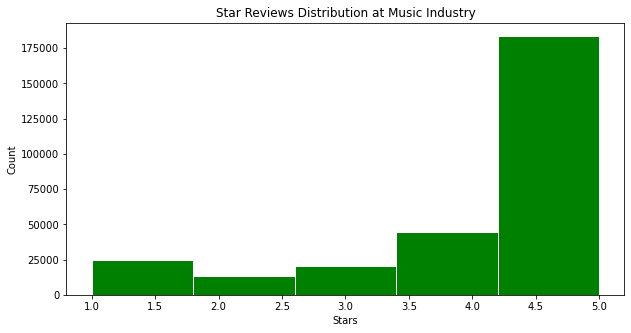

In [69]:
# Create Univariate Histrogram of Music Category star distribution

plt.figure(figsize=[10,5])

plt.hist(brand_n_score_timeline['score'], bins=5, edgecolor='white', align='mid', color = 'green'); 

plt.xlabel("Stars");
plt.ylabel("Count");
plt.title("Star Reviews Distribution at Music Industry");
plt.show();

In [70]:
# Group timeline subset using the mean on both columns

mean_timeline_brand_ds = brand_n_score_timeline.groupby(['date'], as_index = False).mean()
mean_timeline_brand_ds.head(6)

,date,score,cnt,year
0,2000-04-05,4.0,1.0,2000.0
1,2000-10-11,5.0,1.0,2000.0
2,2001-08-16,5.0,1.0,2001.0
3,2002-03-01,5.0,1.0,2002.0
4,2002-06-01,5.0,1.0,2002.0
5,2002-09-09,5.0,1.0,2002.0


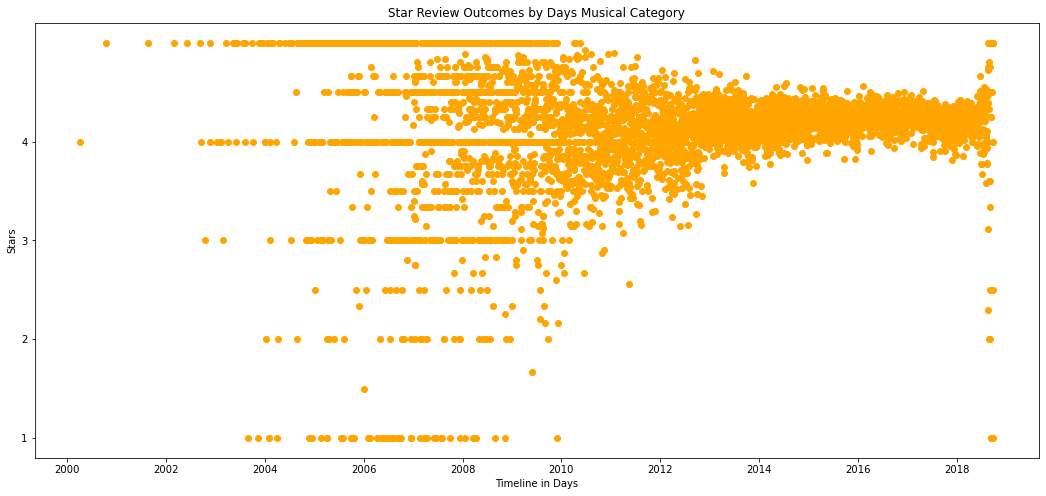

In [71]:
plt.figure(figsize=(18,8))
y = mean_timeline_brand_ds['score']
x = mean_timeline_brand_ds['date']
plt.scatter(x,y).set_color("orange");

plt.yticks(range(1, 5))

plt.title('Star Review Outcomes by Days Musical Category')
plt.xlabel('Timeline in Days')
plt.ylabel('Stars');

In [72]:
# Group timeline subset using the year and mean on both columns

year_mean_timeline_brand_ds = mean_timeline_brand_ds.groupby(['year'], as_index = False).mean()
year_mean_timeline_brand_ds.head()

,year,score,cnt
0,2000.0,4.500000,1.0
1,2001.0,5.000000,1.0
2,2002.0,4.428571,1.0
3,2003.0,4.142857,1.0
4,2004.0,4.098214,1.0


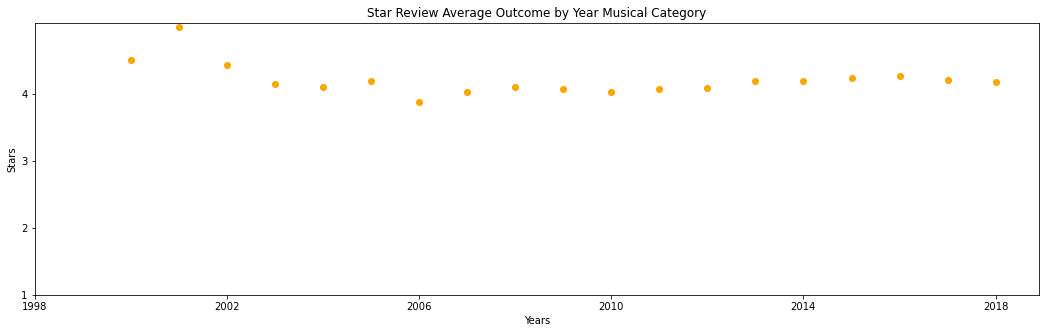

In [73]:
# Now plot by year

plt.figure(figsize=(18,5))
y = year_mean_timeline_brand_ds['score']
x = year_mean_timeline_brand_ds['year']
plt.scatter(x,y).set_color("orange");

plt.yticks(range(1, 5))
plt.xticks([1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Star Review Average Outcome by Year Musical Category')
plt.xlabel('Years')
plt.ylabel('Stars');

In [74]:
# Group timeline subset using sum on both columns

sum_timeline_brand_ds = brand_n_score_timeline.groupby(['date'], as_index = False).sum()
sum_timeline_brand_ds.head(6)

,date,score,cnt,year
0,2000-04-05,4,1,2000
1,2000-10-11,5,1,2000
2,2001-08-16,5,1,2001
3,2002-03-01,5,1,2002
4,2002-06-01,5,1,2002
5,2002-09-09,5,1,2002


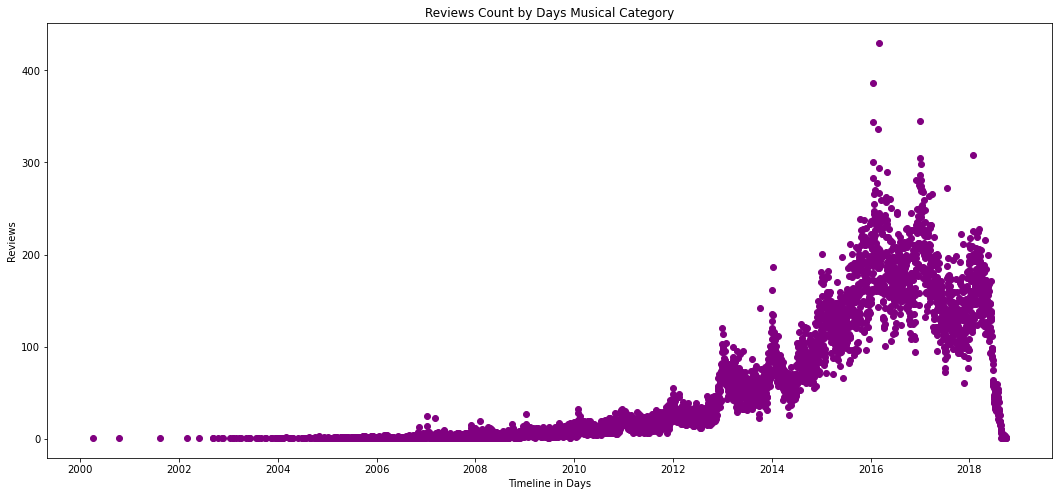

In [75]:
plt.figure(figsize=(18,8))
y = sum_timeline_brand_ds['cnt']
x = sum_timeline_brand_ds['date']
plt.scatter(x,y).set_color("purple");

plt.title('Reviews Count by Days Musical Category')
plt.xlabel('Timeline in Days')
plt.ylabel('Reviews');

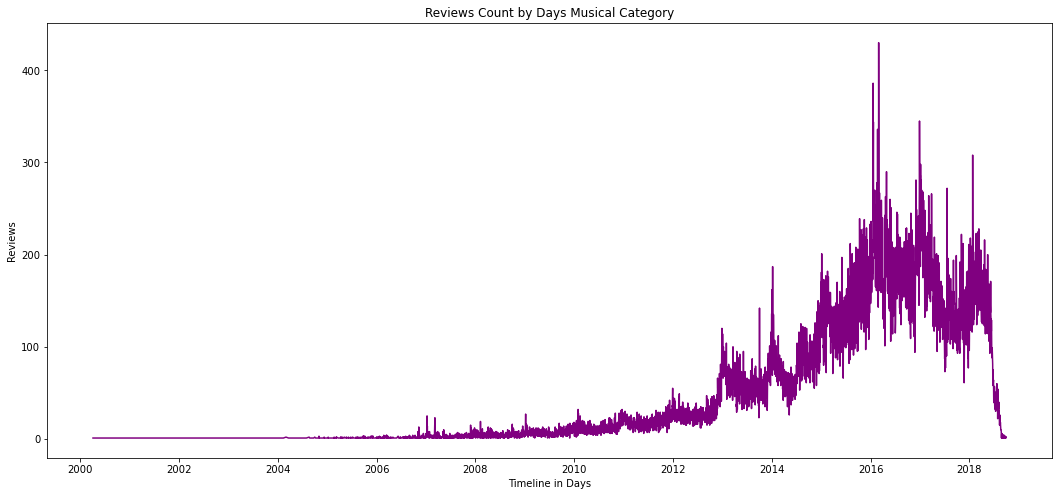

In [76]:
# Likely will look better with a line plot

plt.figure(figsize=(18,8))
new_y_limit = sns.lineplot(x = 'date', y = 'cnt', data = sum_timeline_brand_ds, color = 'purple');

#new_y_limit.set_ylim(0, 5)
#new_y_limit.set_xlim(1998, 2018)

#new_y_limit.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018], yticks=[1, 2, 3, 4, 5])

#Axes.set_xlim(self, left=None, right=None, emit=True, auto=False, *, xmin=None, xmax=None)
#Axes.set_ylim(self, bottom=None, top=None, emit=True, auto=False, *, ymin=None, ymax=None)


plt.title('Reviews Count by Days Musical Category')
plt.xlabel('Timeline in Days')
plt.ylabel('Reviews');

In [77]:
# Seems we can benefit of a grouped year version of data

# Group timeline subset using the year and sum on both columns

year_sum_timeline_brand_ds = brand_n_score_timeline.groupby(['year'], as_index = False).sum()
year_sum_timeline_brand_ds.head(6)

,year,score,cnt
0,2000,9,2
1,2001,5,1
2,2002,31,7
3,2003,87,21
4,2004,262,63
5,2005,854,204


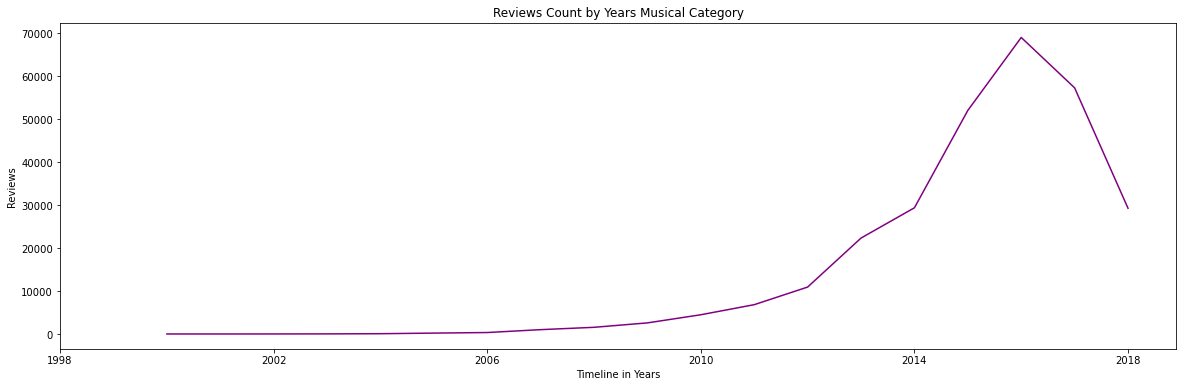

In [78]:
# Likely will look better with a line plot

plt.figure(figsize=(20,6))
new_yrs_limit = sns.lineplot(x = 'year', y = 'cnt', data = year_sum_timeline_brand_ds, color = 'purple');

new_yrs_limit.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Reviews Count by Years Musical Category')
plt.xlabel('Timeline in Years')
plt.ylabel('Reviews');

In [79]:
# A final summary statistics overview of the scores

brand_n_score_timeline['score'].describe()

count    287123.000000
mean          4.214323
std           1.277622
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: score, dtype: float64

In [80]:
brand_n_score_timeline['score'].value_counts()

5    183690
4     44454
1     24836
3     20641
2     13502
Name: score, dtype: int64

In [81]:
# Counting total of 5 stars records

fivestar_ds = cmods[cmods['score'] == 5]
fivestar_ds.shape

(181433, 11)

In [82]:
# Counting total of 4 stars records

fourstar_ds = cmods[cmods['score'] == 4]
fourstar_ds.shape

(43798, 11)

In [83]:
# Counting total of 3 stars records

threestar_ds = cmods[cmods['score'] == 3]
threestar_ds.shape

(20298, 11)

In [84]:
# Counting total of 2 stars records

twostar_ds = cmods[cmods['score'] == 2]
twostar_ds.shape

(13251, 11)

In [85]:
# Counting total of 1 star records

onestar_ds = cmods[cmods['score'] == 1]
onestar_ds.shape

(24288, 11)

In [86]:
grp_by_year_and_score_brand = brand_n_score_timeline.groupby(['year','score']).count().reset_index()
grp_by_year_and_score_brand.drop(['date'], axis = 1, inplace = True)
display(grp_by_year_and_score_brand)

,year,score,brand,cnt
0,2000,4,1,1
1,2000,5,1,1
2,2001,5,1,1
3,2002,3,1,1
4,2002,4,2,2
...,...,...,...,...
80,2018,1,2847,2847
81,2018,2,1385,1385
82,2018,3,1932,1932
83,2018,4,3664,3664


In [87]:
grp_by_year_and_score_brand.columns

Index(['year', 'score', 'brand', 'cnt'], dtype='object')

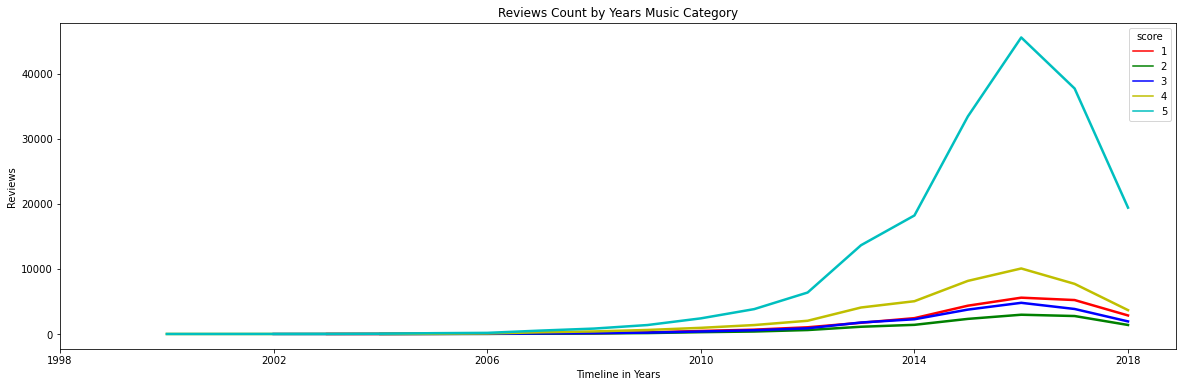

In [88]:
# Combining all of the score per group of star rating over the years with lines

plt.figure(figsize=(20,6))
score_combo_limits = sns.lineplot(x='year', y='cnt', hue='score', data=grp_by_year_and_score_brand, palette=['r', 'g', 'b', 'y', 'c'], linewidth=2.5);

#score_combo_limits = sns.lineplot(x='year', y='cnt', hue='score', data=grp_by_year_and_score, linewidth=2.5);

score_combo_limits.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Reviews Count by Years Music Category')
plt.xlabel('Timeline in Years')
plt.ylabel('Reviews');

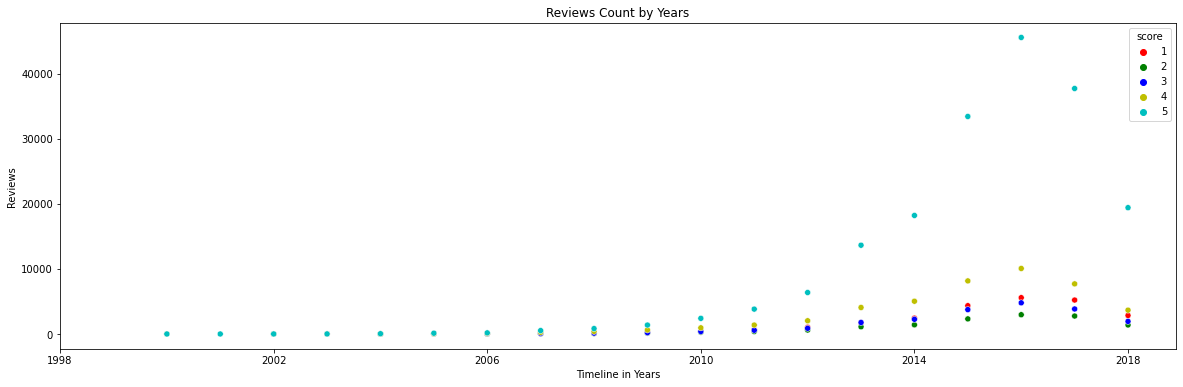

In [89]:
# Combining all of the score per group of star rating over the years with a scatter plot

plt.figure(figsize=(20,6))
score_combo_s_limits = sns.scatterplot(x='year', y='cnt', hue='score', data=grp_by_year_and_score_brand, palette=['r', 'g', 'b', 'y', 'c']);

score_combo_s_limits.set(xticks=[1998, 2002, 2006, 2010, 2014, 2018])

plt.title('Reviews Count by Years')
plt.xlabel('Timeline in Years')
plt.ylabel('Reviews');

## Checkpoint

In [91]:
# Loading the merged and clean Musical Category dataset

cmods.to_parquet('final_music_ds_842023_PM.parquet')

<div class="alert alert-block alert-warning">

<h2> Process Insights 8/4/2023</h2>
-------------------------------------------------------------------------------------------------------------------------------

    
- There is an overall trend towards more reviews over time accentuated since 2013 which is a good thing as more data can be leveraged on, however, the trend reaches it's peak at year 2016 and then goes back in 2017 to a similar data point as the year prior to the peak (back to 2015 numbers). Then 2018 while incomplete, still seems to now might be less than 2015 yet data might be incomplete so needs to be confirmed once the 2018 data is complete. It therefore, follows the general Amazon trend.
- Score/Review of 1 star only accounts for 13,502 of the 287,123 reviews which is 4.70%.
- Score/Review of 4 stars accounts for 44,454 of the 287,123 reviews which is 15.48%.
- Score/Review of 5 stars accounts for 183,690 of the 287,123 reviews which is 63.98%.
    
    

<h3> It is an overwhelming mayority of positive reviews (79.46% with either 5 or 4 stars and mean of 4.21 stars) which allows to better extract what is that consumers like and/or enjoy the most which allows to suggest new products and/or predict customer satisfaction per market needs. 
</h3> 
    
<h3> Now we need to move into an specific companies so we can select one to target to benefit from the insights related to brand health and improvement. 
</h3> 
       
</div>
